# Load the libraries

In [3]:
library(Seurat)
library(SeuratDisk)
library(anndata)
library(viridis)
library(ggplot2)
library(ghibli)
library(Rmisc)
library(edgeR)
library(DESeq2)
library(MoMAColors)

'%notin%' <- Negate('%in%')

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attaching package: ‘anndata’


The following object is masked from ‘package:SeuratObject’:

    Layers


Loading required package: viridisLite

Loading required package: lattice

Loading required package: plyr

Loading required package: limma

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, m

# Process the data

In [2]:
# Load the data
data <- LoadH5Seurat("/n/groups/neuroduo/Bruno/Schroeder_2024_astrocyte_atlas/SCP2719/anndata/adata_mouse_allages_allregions_forBroadSCPortal.h5seurat",
                    misc=FALSE,
                    assays = "RNA",
                    meta.data=FALSE)

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction latent_gene_encoding

Adding cell embeddings for latent_gene_encoding

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from latent_gene_encoding_ to latentgeneencoding_”
Adding miscellaneous information for latent_gene_encoding

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction scVI

Adding cell embeddings for scVI

Adding miscellaneous information for scVI

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding command information



In [10]:
# Load RDS object
seurat_obj <- readRDS('/n/groups/neuroduo/Bruno/RDS_files/240411_astrocyte_snRNA_atlas.rds')

In [12]:
# Transfer over metadata
data@meta.data <- seurat_obj@meta.data

In [14]:
# Save RDS object
saveRDS(data,'/n/groups/neuroduo/Bruno/RDS_files/240414_astrocyte_snRNA_atlas.rds')

In [2]:
# Read in RDS object
seurat_obj <- readRDS('/n/groups/neuroduo/Bruno/RDS_files/240414_astrocyte_snRNA_atlas.rds')

In [3]:
# Subset only astrocytes
seurat_obj_astrocyte <- subset(seurat_obj, subset = cell_type__ontology_label == 'astrocyte')

In [ ]:
# Save RDS file
saveRDS(seurat_obj_astrocyte, '/n/groups/neuroduo/Bruno/RDS_files/250413_seurat_obj_astrocyte.rds')

# Calculate module scores for GR-activated and -repressed genes for Fig. 3

In [2]:
# Read in RDS file
seurat_obj_astrocyte <- readRDS('/n/groups/neuroduo/Bruno/RDS_files/250413_seurat_obj_astrocyte.rds')

In [12]:
# Remove any existing calculation
seurat_obj_astrocyte$GR_features1 <- NULL
seurat_obj_astrocyte$GR_features2 <- NULL

In [2]:
# Read in GR-target gene data
P21_DEG <- readRDS('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res.rds')

In [3]:
# Subset activated & repressed genes
GR_activate <- rownames(P21_DEG[(P21_DEG$log2FoldChange > 0) & (P21_DEG$padj < 0.05),])
GR_repress <- rownames(P21_DEG[(P21_DEG$log2FoldChange < 0) & (P21_DEG$padj < 0.05),])

In [16]:
# Normalize counts
seurat_obj_astrocyte <- NormalizeData(seurat_obj_astrocyte)

In [17]:
# Re-run variable features
seurat_obj_astrocyte <- FindVariableFeatures(seurat_obj_astrocyte, selection.method = "vst", nfeatures = 2000)

In [18]:
# Re-run scaledata
all.genes <- rownames(seurat_obj_astrocyte)
seurat_obj_astrocyte <- ScaleData(seurat_obj_astrocyte, features = all.genes)

Centering and scaling data matrix



In [19]:
# Re-run dimensionality reduction
seurat_obj_astrocyte <- RunPCA(seurat_obj_astrocyte, features = VariableFeatures(object = seurat_obj_astrocyte))

PC_ 1 
Positive:  Top2a, Lockd, Kif11, Bcl11a, Dlx6os1, Knl1, Gm38505, Adarb2, Celf4, Kif15 
	   Tmem131l, Tox3, Frmd5, Kcnh7, Mki67, Neil3, Kif23, Dscaml1, Pak3, 2610307P16Rik 
	   Tpx2, Elavl3, Gm26936, Ect2, Dcx, Lmnb1, Nsd2, Setbp1, Mis18bp1, Dlx1 
Negative:  Slc1a2, Mdga2, Trpm3, Prex2, Plcb1, Lrrc4c, Rgs6, Luzp2, Kirrel3, Nhsl1 
	   Fam20a, Kank1, Cdh19, Mgat4c, Kcnma1, Cntn1, Gabbr2, Grm3, Brinp3, Lgi1 
	   Lhfp, Aldh1a1, Sat1, Etnppl, Unc13c, Slc6a11, Fry, Galnt18, Gria1, Lrp1b 
PC_ 2 
Positive:  Dlx6os1, Lockd, Nol4, Celf4, Dlx1, Top2a, Dcx, Kif11, Adarb2, Bcl11a 
	   Kif23, Mki67, Neil3, Kif15, Dlx1as, Knl1, Nell2, Mir124a-1hg, Gad2, Ttk 
	   Tpx2, Plcb1, Cdca2, Gm38505, Nsg2, Jpt1, Mis18bp1, Cenpe, Elavl3, Cdca7 
Negative:  Cfap299, Dnah6, Zbbx, Cfap54, Dnah12, Ak7, Ak9, Dnah9, Csmd1, Cfap65 
	   Spag6l, C230072F16Rik, Lrriq1, Cfap61, Ankfn1, Hydin, Ccdc30, Cfap43, Vwa3a, Wdr63 
	   Enkur, Agbl4, Cfap44, Gm42722, Spag16, Ccdc170, Cfap69, Pakap, Daw1, Wdr66 
PC_ 3 
Positive: 

In [24]:
# Add module score
seurat_obj_astrocyte <- AddModuleScore(
  object = seurat_obj_astrocyte,
  features = list(GR_up_features = GR_activate[GR_activate %in% rownames(seurat_obj_astrocyte)],
                  GR_repress_features = GR_repress[GR_repress %in% rownames(seurat_obj_astrocyte)]),
  name = 'GR_features'
)

In [25]:
# Save object after additional processing
saveRDS(seurat_obj_astrocyte,'/n/groups/neuroduo/Bruno/RDS_files/250426_seurat_obj_astrocyte.rds')

# Plot UMAP of GR-activated and GR-repressed module scores for Fig. 3

In [8]:
# Load object
seurat_obj_astrocyte <- readRDS('/n/groups/neuroduo/Bruno/RDS_files/250426_seurat_obj_astrocyte.rds')

In [9]:
# Set plotting order for age
seurat_obj_astrocyte$age <- factor(seurat_obj_astrocyte$age, levels = 
                                   c('E18.5','P4','P14','P32','P90','90weeks'))

In [10]:
# Drop out 90weeks sample for UMAP plotting
seurat_obj_astrocyte_filt <- seurat_obj_astrocyte[,seurat_obj_astrocyte$age %notin% c('90weeks')]

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


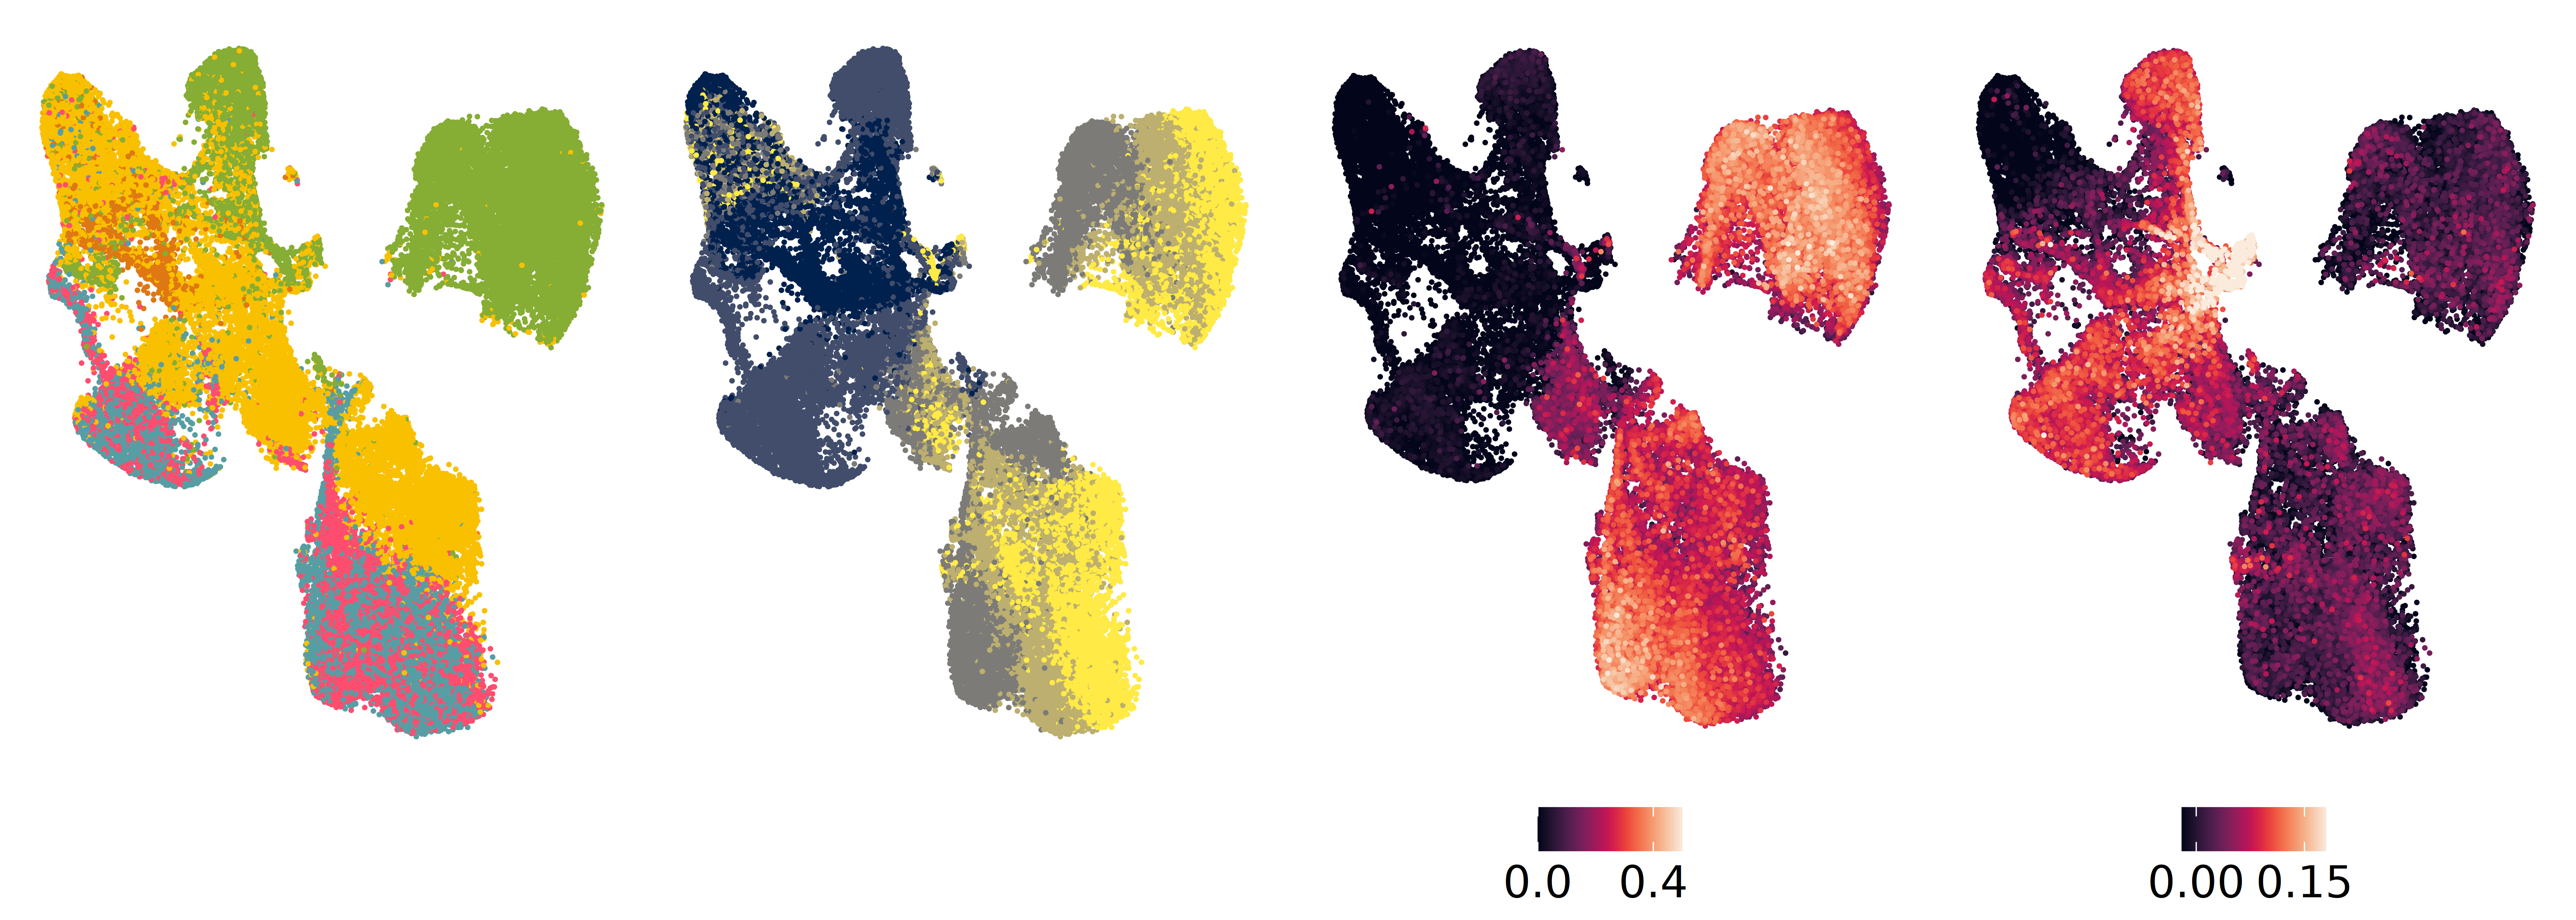

In [11]:
# Generate plots
options(repr.plot.width=14, repr.plot.height=5,repr.plot.res=500)

p1 <- DimPlot(seurat_obj_astrocyte_filt, group.by = 'region',shuffle=TRUE) + 
theme_void() + 
theme(plot.title=element_blank(),legend.position='none',legend.text=element_text(size=12),
     plot.margin = margin(0, 0, 53, 0)) +
scale_color_manual(values=as.vector(moma.colors("Klein", 5)))

p2 <- DimPlot(seurat_obj_astrocyte_filt, group.by = 'age',shuffle=TRUE) + 
theme_void() + 
theme(plot.title=element_blank(),legend.position='none',legend.text=element_text(size=12),
     plot.margin = margin(0, 0, 53, 0)) +
scale_color_manual(values=cividis(5))

p3 <- FeaturePlot(seurat_obj_astrocyte_filt, features = 'GR_features1',order=TRUE,min.cutoff=0,max.cutoff=.5) + 
scale_color_viridis(option='rocket',breaks=c(0,0.4)) + 
theme_void() + 
theme(plot.title=element_blank(),legend.position='bottom',legend.key.width = unit(0.4,'cm'),legend.text=element_text(size=17)) 

p4 <- FeaturePlot(seurat_obj_astrocyte_filt, features = 'GR_features2',order=TRUE,min.cutoff=-.02,max.cutoff=.18) + 
scale_color_viridis(option='rocket',breaks=c(0,0.15)) + 
theme_void() + 
theme(plot.title=element_blank(),legend.position='bottom',legend.key.width = unit(0.4,'cm'),legend.text=element_text(size=17))


cowplot::plot_grid(p1,p2,p3,p4,ncol=4)

# Plot expression of GR-activated and -repressed modules on line plots

In [12]:
# Create dataframe of counts
astro_GR_activated_counts <- data.frame(counts = seurat_obj_astrocyte@meta.data$GR_features1,
                                        Region = seurat_obj_astrocyte$region,
                                        Age = seurat_obj_astrocyte$age)
# Set day variable as time
astro_GR_activated_counts$Time <- ifelse(astro_GR_activated_counts$Age=='E18.5',-2.5,
                        ifelse(astro_GR_activated_counts$Age=='P4',4,
                        ifelse(astro_GR_activated_counts$Age=='P14',14,
                               ifelse(astro_GR_activated_counts$Age=='P32',32,
                                      ifelse(astro_GR_activated_counts$Age=='P90',90,630)))))
# Create dataframe of counts
astro_GR_repressed_counts <- data.frame(counts = seurat_obj_astrocyte@meta.data$GR_features2,
                                        Region = seurat_obj_astrocyte$region,
                                        Age = seurat_obj_astrocyte$age)
# Set day variable as time
astro_GR_repressed_counts$Time <- ifelse(astro_GR_repressed_counts$Age=='E18.5',-2.5,
                        ifelse(astro_GR_repressed_counts$Age=='P4',4,
                        ifelse(astro_GR_repressed_counts$Age=='P14',14,
                               ifelse(astro_GR_repressed_counts$Age=='P32',32,
                                      ifelse(astro_GR_repressed_counts$Age=='P90',90,630)))))

# Remove 90week & E18.5 timepoints
astro_GR_repressed_counts_filt <- astro_GR_repressed_counts[astro_GR_repressed_counts$Age %notin% c('90weeks','E18.5'),]
astro_GR_activated_counts_filt <- astro_GR_activated_counts[astro_GR_activated_counts$Age %notin% c('90weeks','E18.5'),]

# Compute summary stats
repress_df <- summarySE(astro_GR_repressed_counts_filt, measurevar="counts", conf.interval = 0.99, groupvars=c("Region","Time"))
activate_df <- summarySE(astro_GR_activated_counts_filt, measurevar="counts", conf.interval = 0.99, groupvars=c("Region","Time"))

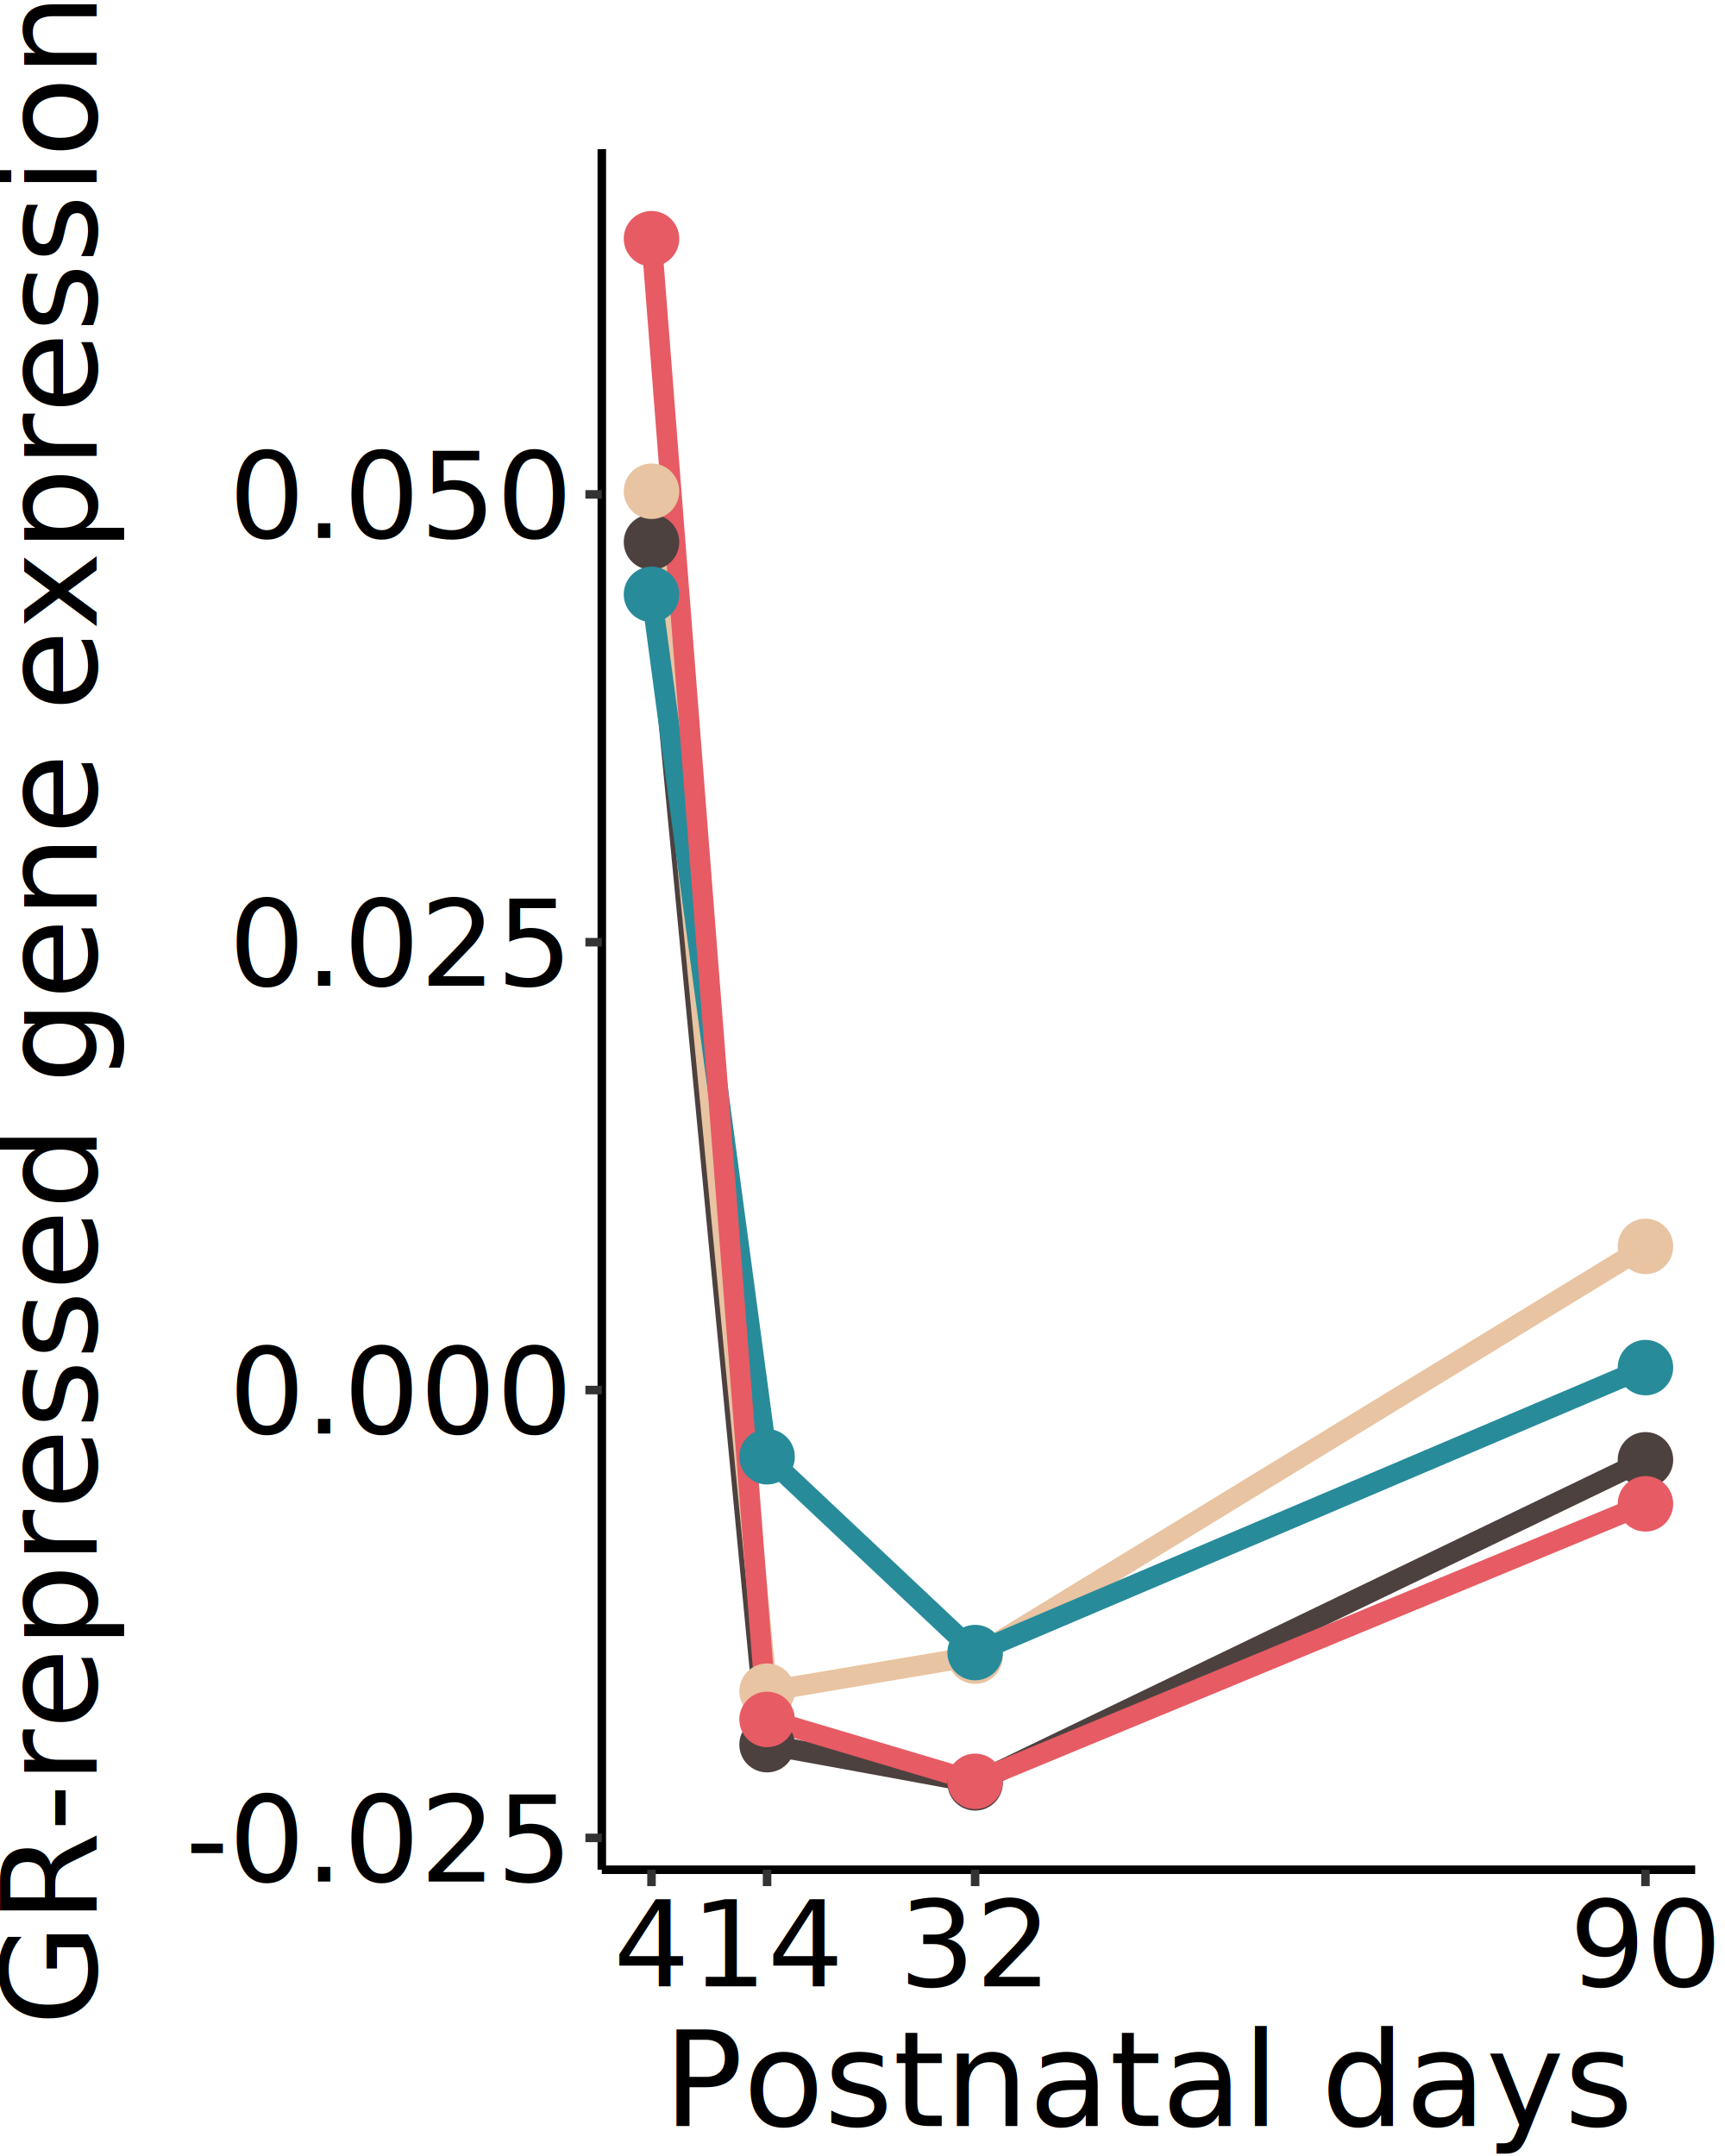

In [13]:
# Generate repress line plot
options(repr.plot.width=4, repr.plot.height=5,repr.plot.res=500)

scaleFUN <- function(x) sprintf("%.3f", x)

ggplot(repress_df, aes(x=Time, y=counts, colour=Region)) + 
    geom_ribbon(aes(x=as.numeric(Time),ymax = counts + se, ymin = counts - se,fill=Region),
              alpha = 0.3,
              linetype=0) + 
    geom_line(aes(group=Region),linewidth=1.2) +
    geom_point(size=3.5) + theme_classic() + scale_x_continuous(breaks=c(4, 14,32,90)) +
scale_color_manual(values=ghibli_palettes$PonyoMedium[c(1,7,3,4)]) +
scale_fill_manual(values=ghibli_palettes$PonyoMedium[c(1,7,3,4)]) +
ylab('GR-repressed gene expression') +
xlab('Postnatal days') +
scale_y_continuous(labels=scaleFUN) +
theme(legend.position='none',
     axis.text=element_text(size=20,color='black'),
     axis.title=element_text(size=22,color='black'),
     plot.margin=margin(25,5,0,0),
     axis.title.y = element_text(margin = margin(0,10,0,0)))

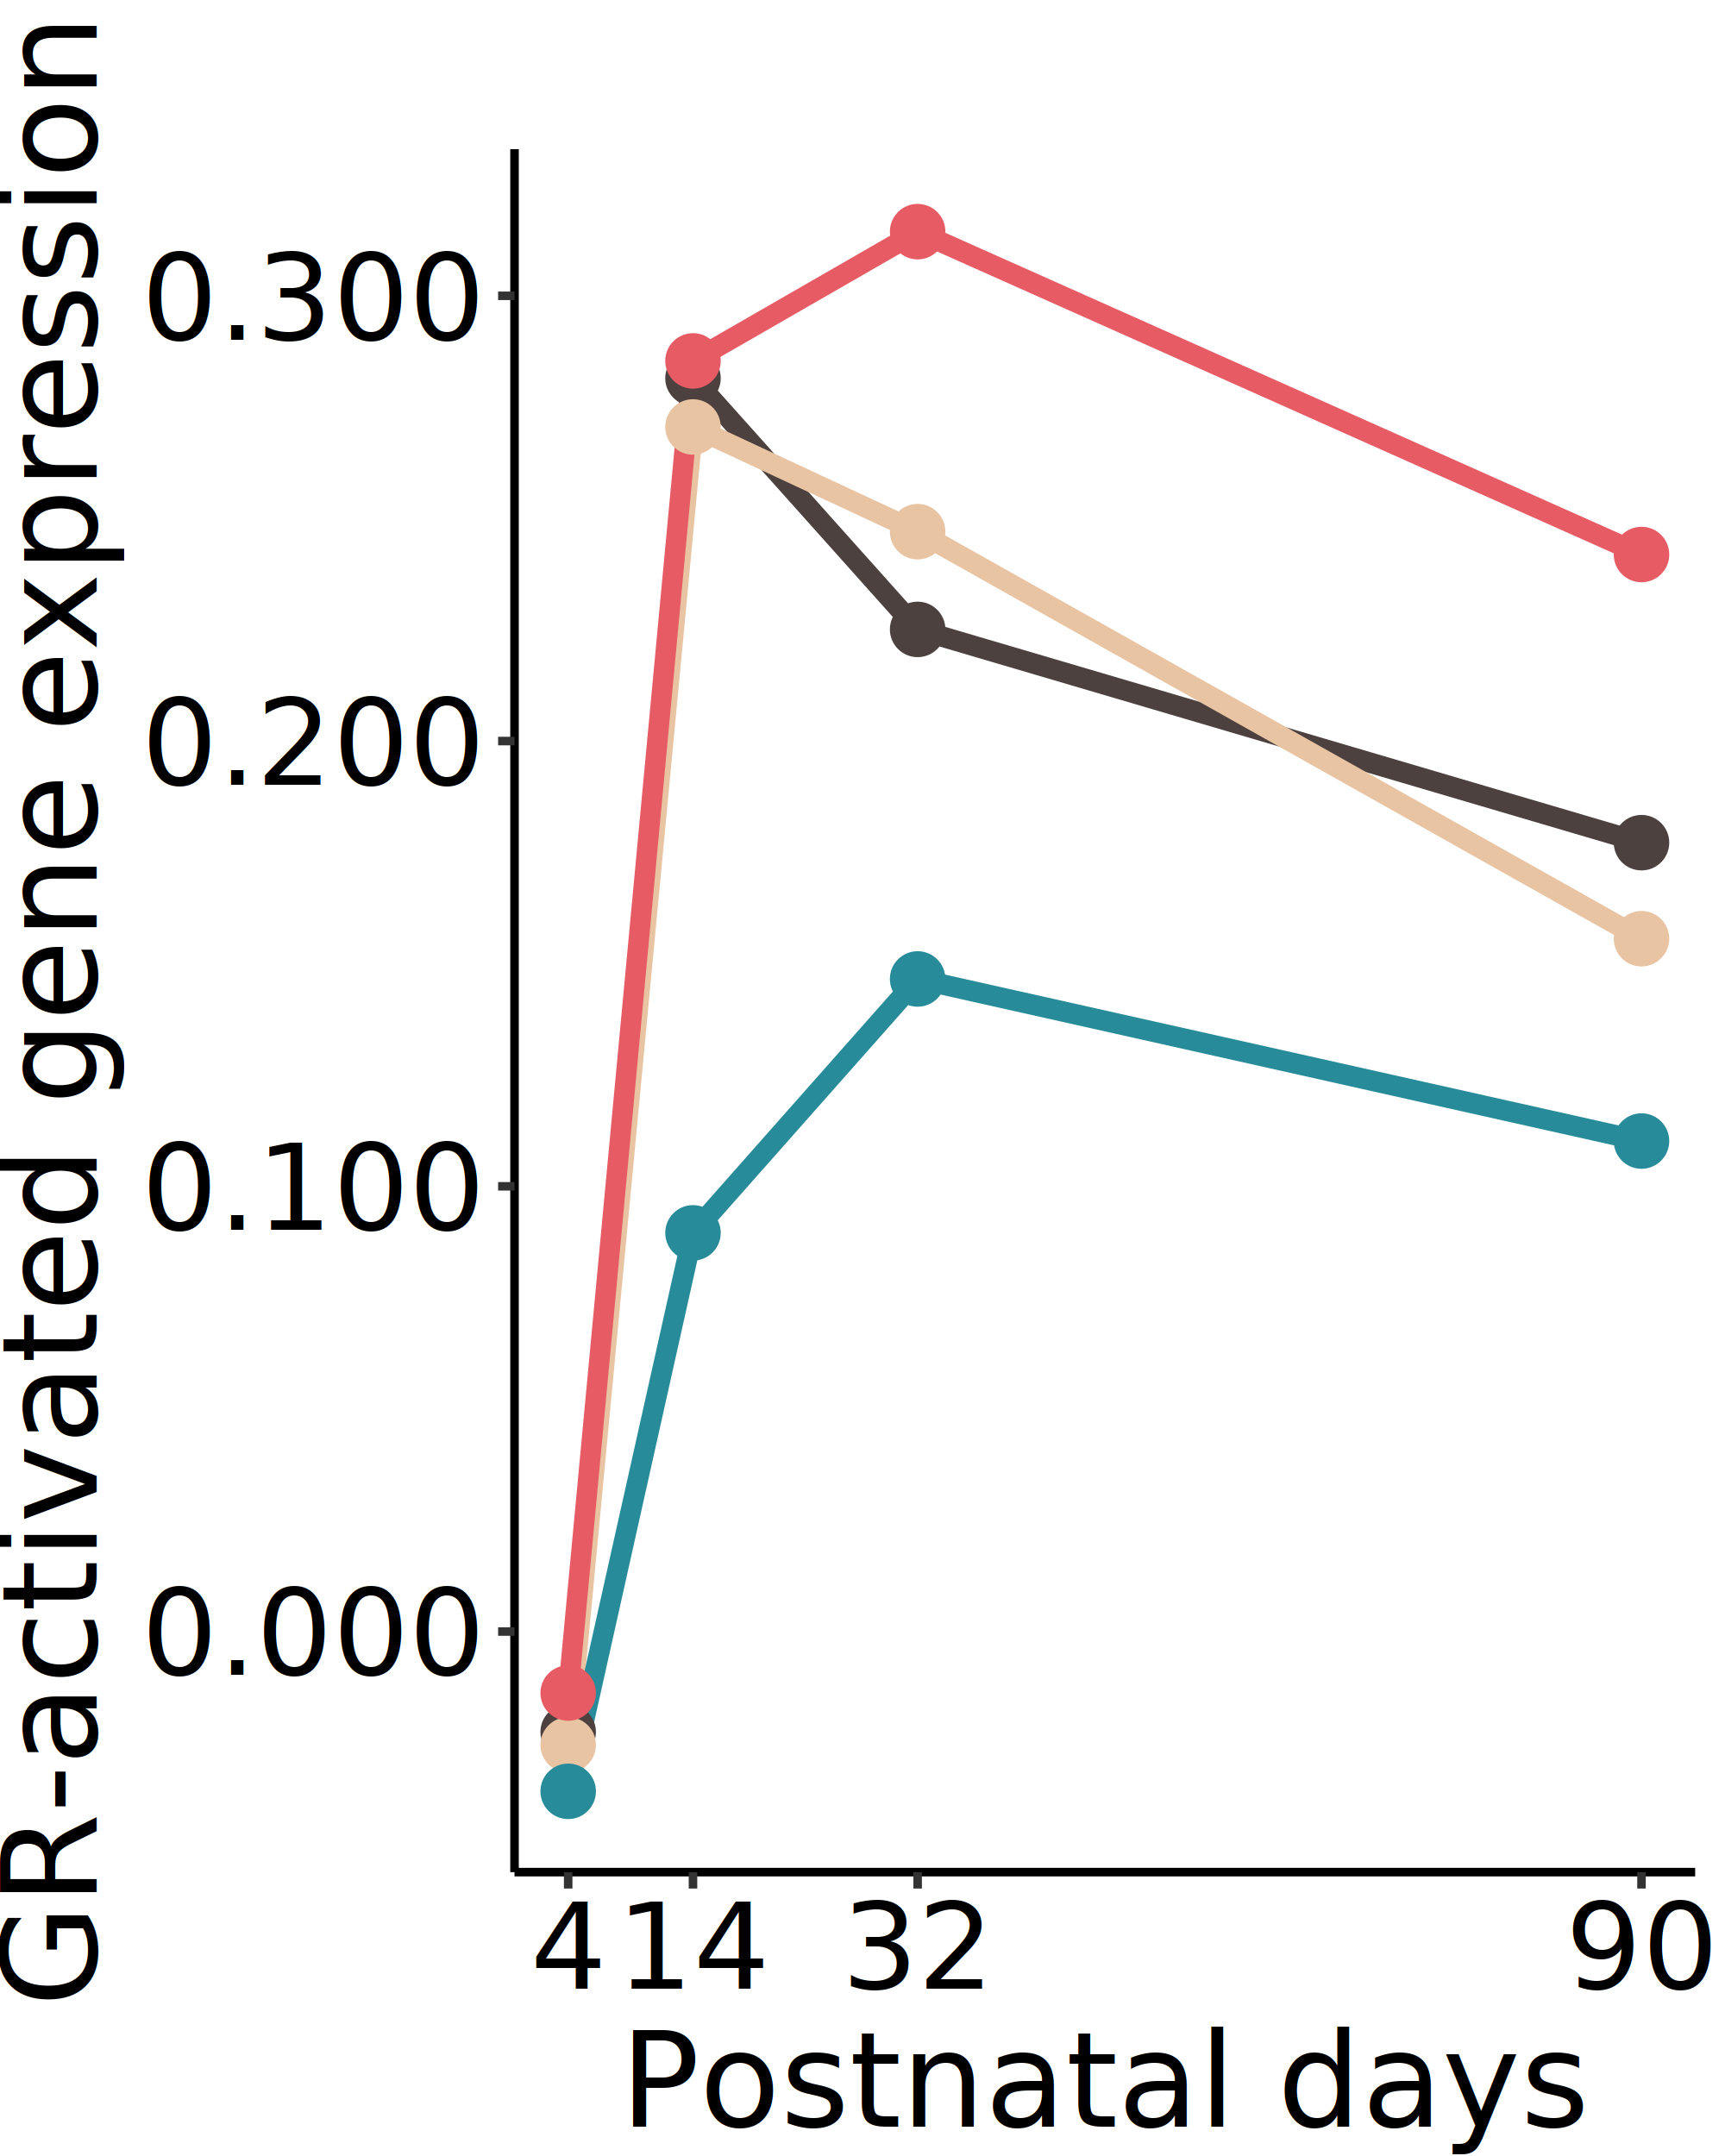

In [51]:
# Generate activate line plot
options(repr.plot.width=4, repr.plot.height=5,repr.plot.res=500)

scaleFUN <- function(x) sprintf("%.3f", x)

ggplot(activate_df, aes(x=Time, y=counts, colour=Region)) + 
    geom_ribbon(aes(x=as.numeric(Time),ymax = counts + se, ymin = counts - se,fill=Region),
              alpha = 0.4,
              linetype=0) + 
    geom_line(aes(group=Region),linewidth=1.2) +
    geom_point(size=3.5) + theme_classic() + scale_x_continuous(breaks=c(4, 14,32,90)) +
scale_color_manual(values=ghibli_palettes$PonyoMedium[c(1,7,3,4)]) +
scale_fill_manual(values=ghibli_palettes$PonyoMedium[c(1,7,3,4)]) +
ylab('GR-activated gene expression') +
xlab('Postnatal days') +
scale_y_continuous(labels=scaleFUN) +
theme(legend.position='none',
     axis.text=element_text(size=20,color='black'),
     axis.title=element_text(size=22,color='black'),
           plot.margin=margin(25,5,0,0),
     axis.title.y = element_text(margin = margin(0,10,0,0)))

# Identify astrocyte developmental DEGs for overlap analysis with GR-dependent genes

In [ ]:
# Drop out E18.5 and 90weeks samples for analysis
seurat_obj_astrocyte_filt <- subset(seurat_obj_astrocyte, subset = age %notin% c('90weeks','E18.5'))

In [4]:
# Add ID
seurat_obj_astrocyte_filt$donorID_region <- paste0(seurat_obj_astrocyte_filt$donor_id,'_',
                                                   seurat_obj_astrocyte_filt$region_dissected)

In [5]:
# Pseudo-bulk expression by sample
seurat_obj_astrocyte_agg <- AggregateExpression(seurat_obj_astrocyte_filt,
                                                return.seurat=TRUE,
                                                group.by = "donorID_region")

Names of identity class contain underscores ('_'), replacing with dashes ('-')
This message is displayed once every 8 hours.
First group.by variable `donorID_region` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.
Centering and scaling data matrix



In [6]:
# Create metadata
metadata_df <- data.frame(Sample = colnames(seurat_obj_astrocyte_agg$RNA),
                          Age = do.call(rbind,strsplit(names(seurat_obj_astrocyte_agg$donorID_region),'-'))[,2],
                          Group = paste0(do.call(rbind,strsplit(names(seurat_obj_astrocyte_agg$donorID_region),'-'))[,2],'-',
                                         do.call(rbind,strsplit(names(seurat_obj_astrocyte_agg$donorID_region),'-'))[,4]),
                          Region = do.call(rbind,strsplit(names(seurat_obj_astrocyte_agg$donorID_region),'-'))[,4])

In [14]:
# Run DESeq2 analysis (use this to match DESeq analysis used for bulk astrocyte RNA-seq)
deseq_obj <- DESeqDataSetFromMatrix(countData = GetAssayData(seurat_obj_astrocyte_agg,slot='counts'),
                              colData = metadata_df,
                              design = ~ Group)

smallestGroupSize <- 3
keep <- rowSums(counts(deseq_obj) >= 50) >= smallestGroupSize
deseq_obj <- deseq_obj[keep,]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [15]:
# Run DESeq2
deseq_obj <- DESeq(deseq_obj)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing



In [46]:
# Generate results
resMO <- na.omit(as.data.frame(results(deseq_obj,   contrast=c("Group","P32-MO","P4-MO"),lfcThreshold=1)))
resPFC <- na.omit(as.data.frame(results(deseq_obj,  contrast=c("Group","P32-PFC","P4-PFC"),lfcThreshold=1)))
resSTR <- na.omit(as.data.frame(results(deseq_obj,  contrast=c("Group","P32-striatum","P4-striatum"),lfcThreshold=1)))
resTHAL <- na.omit(as.data.frame(results(deseq_obj, contrast=c("Group","P32-thalamus","P4-thalamus"),lfcThreshold=1)))

In [17]:
# Read in GR-target gene data
P21_DEG_relax <- readRDS('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res_relax.rds')

In [53]:
# Compute overlaps
resPFC_pos_overlap <- table(rownames(resPFC[(resPFC$padj < 0.05) &
                     (resPFC$log2FoldChange > 0),]) %in% rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))[2] / 
length(rownames(resPFC[(resPFC$padj < 0.05) &
                     (resPFC$log2FoldChange > 0),]))

resPFC_neg_overlap <- table(rownames(resPFC[(resPFC$padj < 0.05) &
                     (resPFC$log2FoldChange < 0),]) %in% rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))[2] / 
length(rownames(resPFC[(resPFC$padj < 0.05) &
                     (resPFC$log2FoldChange < 0),]))


resMO_pos_overlap <- table(rownames(resMO[(resMO$padj < 0.05) &
                     (resMO$log2FoldChange > 0),]) %in% rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))[2] / 
length(rownames(resMO[(resMO$padj < 0.05) &
                     (resMO$log2FoldChange > 0),]))

resMO_neg_overlap <- table(rownames(resMO[(resMO$padj < 0.05) &
                     (resMO$log2FoldChange < 0),]) %in% rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))[2] / 
length(rownames(resMO[(resMO$padj < 0.05) &
                     (resMO$log2FoldChange < 0),]))


resSTR_pos_overlap <- table(rownames(resSTR[(resSTR$padj < 0.05) &
                     (resSTR$log2FoldChange > 0),]) %in% rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))[2] / 
length(rownames(resSTR[(resSTR$padj < 0.05) &
                     (resSTR$log2FoldChange > 0),]))

resSTR_neg_overlap <- table(rownames(resSTR[(resSTR$padj < 0.05) &
                     (resSTR$log2FoldChange < 0),]) %in% rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))[2] / 
length(rownames(resSTR[(resSTR$padj < 0.05) &
                     (resSTR$log2FoldChange < 0),]))

resTHAL_pos_overlap <- table(rownames(resTHAL[(resTHAL$padj < 0.05) &
                     (resTHAL$log2FoldChange > 0),]) %in% rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))[2] / 
length(rownames(resTHAL[(resTHAL$padj < 0.05) &
                     (resTHAL$log2FoldChange > 0),]))

resTHAL_neg_overlap <- table(rownames(resTHAL[(resTHAL$padj < 0.05) &
                     (resTHAL$log2FoldChange < 0),]) %in% rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))[2] / 
length(rownames(resTHAL[(resTHAL$padj < 0.05) &
                     (resTHAL$log2FoldChange < 0),]))

overlap_df <- data.frame(tissue = c('MO','PFC','STR','THAL'),
                        pos_overlap = c(resMO_pos_overlap, resPFC_pos_overlap, resSTR_pos_overlap, resTHAL_pos_overlap),
                        neg_overlap = c(resMO_neg_overlap, resPFC_neg_overlap, resSTR_neg_overlap, resTHAL_neg_overlap))

Using tissue as id variables



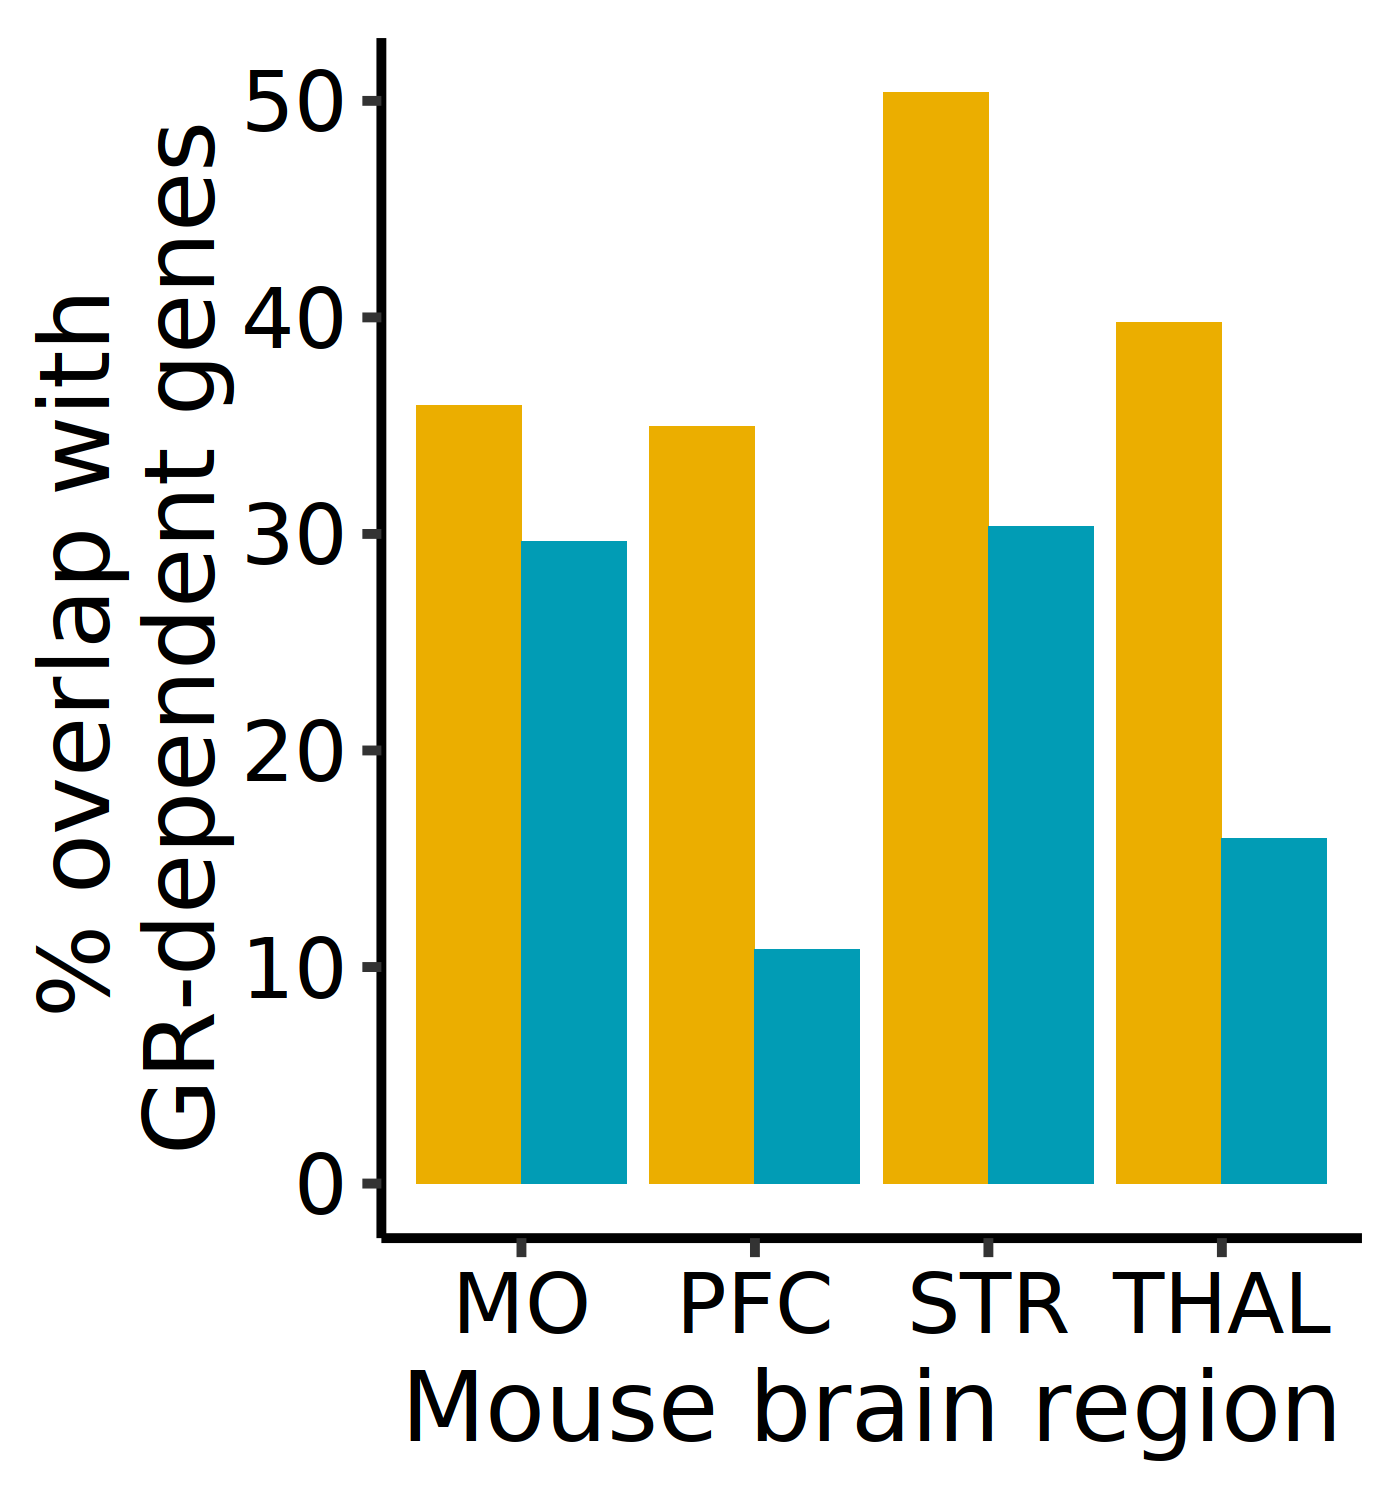

In [66]:
# Generate grouped barplot
options(repr.plot.width=2.8, repr.plot.height=3,repr.plot.res=500)

ggplot(reshape2::melt(overlap_df), aes(fill=variable, y=value*100, x=tissue)) + 
    geom_bar(position="dodge", stat="identity") + theme_classic() + theme(legend.position='none',
                                                                         axis.text=element_text(color='black',size=12),
                                                                         axis.title=element_text(color='black',size=14)) + 
ylab('% overlap with \nGR-dependent genes') + 
xlab('Mouse brain region') + scale_fill_manual(values=c('#EBAE00','#019CB5'))